<a href="https://colab.research.google.com/github/Dillonreed/3831-Coursework-Part-2/blob/main/3831_Coursework_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3831 Coursework Part 2

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Model Assessment Utilities

### Hyperparameter Tuning

In [2]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

def hyperparameterTune(model, hyperparameterGrid):
    # Note start time of model creation and hyperparameter tuning/training
    modelInitialTime = time.time()

    # Create GridSearchCV object to use for hyperparameter tuning
    modelToTune = GridSearchCV(model, hyperparameterGrid)

    # Train GridSearch on training data
    modelToTune.fit(xTrain, yTrain)

    # Find time taken for model
    modelTimeTaken = time.time() - modelInitialTime

    # Get the best combination of hyperparameters
    bestCombination = modelToTune.best_params_
    print(f"Best hyperparameters for model : {bestCombination}")
    print(f"Time taken for model creation and hyperparameter tuning/training : {modelTimeTaken} seconds")

    return modelToTune

### Using Statistical Methods

In [3]:
def assessModelStatistics(testValues, predictionValues):
    # Calculating MSE, MAE, R^2 values for the model
    # MSE/MAE should be as low as possible
    # R^2 should be as close to 1 as possible
    MSE = mean_squared_error(testValues, predictionValues)
    MAE = mean_absolute_error(testValues, predictionValues)
    rSquared = r2_score(testValues, predictionValues)

    # Printing the values
    print(f"Mean Squared Error : {MSE}")
    print(f"Mean Absolute Error : {MAE}")
    print(f"R-squared: {rSquared}")


### Using Graphical Methods

In [4]:
def assessModelGraphs(testValues, predictionValues):
    # Creating a scatter plot of actual vs predicted values
    # Ideally the points will fall along a diagonal line
    plt.scatter(testValues, predictionValues)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    # Add a diagonal line to use to compare predicted values to
    plt.plot([min(testValues), max(testValues)], [min(testValues), max(testValues)], color='red', linestyle='--')

    plt.show()

    # Calculate residuals (difference between the actual and predicted values)
    residuals = testValues - predictionValues

    # Creating a scatter plot showing of residuals vs predicted values
    # A good model will have residuals evenly distributed around the horizontal
    # line at 0
    plt.scatter(predictionValues, residuals)
    plt.axhline(y = 0, color = "r", linestyle = "--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

    # Plotting the distribution of frequency against the residuals
    # Ideally will be a normal distribution
    sns.histplot(residuals, kde = True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals")
    plt.show()

## Reading Data In

In [5]:
houses = pd.read_csv("https://raw.githubusercontent.com/Dillonreed/3831-Coursework-Part-2/main/houses.csv", header=0)

In [6]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

## Plotting Utility

In [7]:
# Boxplot plotting utility code taken from https://github.com/PaoloMissier/CSC3831-2021-22/blob/main/ASSESSED-COURSEWORK/Anomaly_detection_coursework_starter.ipynb

from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type="boxplot", title=None):

    print("plotting columns {c}".format(c=list(columns)))

    if type not in {"boxplot", "dkeplot"}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4

    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)

    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == "boxplot":
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == "boxplot":
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1

    else:
    # general case of a 2D grid
        i=j=0
        for c in columns:
            print("column {c}".format(c=c))
            if type == "boxplot":
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0

## Data Understanding

In [8]:
# Numerically describing the dataset to show the current state of the dataset
houses.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


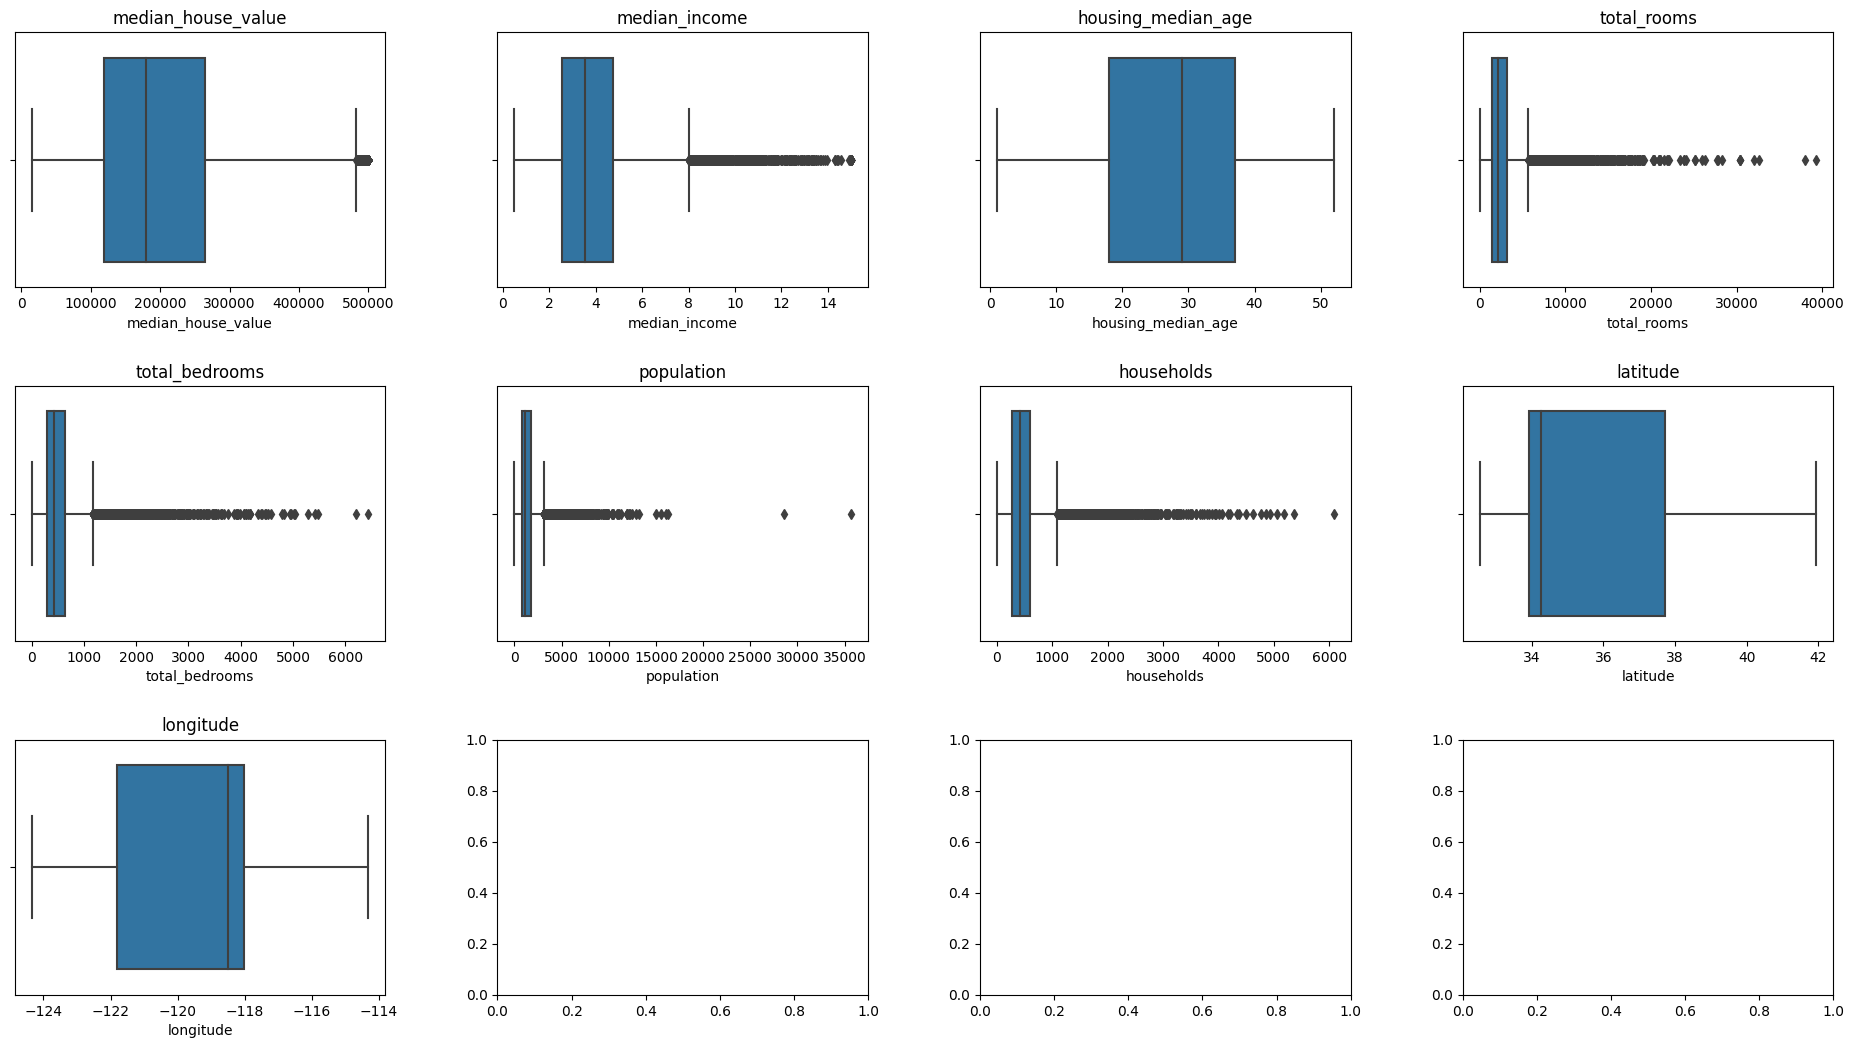

In [9]:
# Plotting box plots of the dataset to visually show the current state of
# the dataset
plot_distributions(houses, houses.columns)

Description of Numerical Statistics
* The dataset has 20,640 records.
* The median house value ranges from 14,999 to 500,001, with a mean of 206,855.82.
* The median income ranges from 0.5 to 15, with a mean of 3.87.
* Housing median age ranges from 1 to 52, with a mean of 28.64.
* Total rooms range from 2 to 39,320, with a mean of 2,635.76.
* Total bedrooms range from 1 to 6,445, with a mean of 537.90.
* Population ranges from 3 to 35,682, with a mean of 1,425.48.
* Households range from 1 to 6,082, with a mean of 499.54.
* Latitude ranges from 32.54 to 41.95, with a mean of 35.63.
* Longitude ranges from -124.35 to -114.31, with a mean of -119.57.

Description of Boxplots of Features from the Dataset

From looking at the boxplots, I can see that the dataset looks to be quite varied which would be beneficial for the training of any potential future models.

Distributed among the features there looks to be quite a large amount of data that lies beyond 1.5 x IQR which could indicate those datapoints to be outliers.
* The Median house value boxplot appears to have quite a few values greater than 1.5 x IQR.
* The Median income boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Housing median age boxplot does not have any values greater than 1.5 x IQR.
* The Total rooms again boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Total bedrooms boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Population boxplot has a large number of values greater than 1.5 x IQR.
* The Households boxplot has large number of values greater than 1.5 x IQR.
* The Latitude boxplot does not have any values greater than 1.5 x IQR.
* The Longitude boxplot does not have any values greater than 1.5 x IQR.

Understanding of the Dataset
* The dataset has a large number of records that will be useful for the training/validation of any potential future models, however with the large amount of data points lying greater than 1.5 x the IQR this could suggest there could be a high amount of outliers.
* The data appears to have a good degree of variance which should lead to good generalizability for any potential future models.
* Each record is the houshold as well as financial information about a geographic area located using latitude/longitude.
* From looking at the spread of the Latitude/Longitude the datapoints appear to be located primarily within the state of California in the United States of America.


## Data Preparation


### Feature Normalisation


In [10]:
# Normalizing features so better conclusions can be drawn

# Create a copy of the houses dataset
normalizedHouses = houses

# Normalizing numerical features for houses by dividing them by the number of
# households to estimate a mean for the geographic area
normalizedHouses["median_income_per_household"] = normalizedHouses["median_income"] / houses["households"]
normalizedHouses["total_rooms_per_household"] = normalizedHouses["total_rooms"] / houses["households"]
normalizedHouses["total_bedrooms_per_household"] = normalizedHouses["total_bedrooms"] / houses["households"]
normalizedHouses["population_per_household"] = normalizedHouses["population"] / houses["households"]

# Drop the normalized features from the normalized dataset
normalizedHouses = houses.drop(columns=["median_income", "total_rooms", "total_bedrooms"])

### Feature Selection


In [11]:
# Documentation from https://scikit-learn.org/stable/modules/feature_selection.html

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel


# Separate features (x) and target feature (y)
x = normalizedHouses.drop("median_house_value", axis = 1)
y = normalizedHouses["median_house_value"]

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state = 3831)

# Technique 1: Correlation Analysis
correlationMatrix = normalizedHouses.corr()
correlationWithTarget = correlationMatrix["median_house_value"].sort_values(ascending = False)
selectedFeaturesCorr = correlationWithTarget[abs(correlationWithTarget) > 0.1].index.tolist()

# Technique 2: Feature Importance (Tree-based Model)
rfModel = RandomForestRegressor(random_state = 3831)
rfModel.fit(xTrain, yTrain)
featureImportances = pd.Series(rfModel.feature_importances_, index = x.columns)
selectedFeaturesRf = featureImportances[featureImportances > 0.1].index.tolist()

# Technique 3: Recursive Feature Elimination (RFE)
lassoModel = LassoCV(cv=5)
sfm = SelectFromModel(lassoModel, threshold = 0.1)
sfm.fit(xTrain, yTrain)
selectedFeaturesRfe = x.columns[sfm.get_support()].tolist()

# Technique 4: Mutual Information
miScores = mutual_info_regression(xTrain, yTrain)
selectedFeaturesMi = x.columns[miScores > 0.1].tolist()

# Print the selected features from each method
print(f"Selected Features (Correlation) : {selectedFeaturesCorr}")
print(f"Selected Features (Random Forest) : {selectedFeaturesRf}")
print(f"Selected Features (RFE) : {selectedFeaturesRfe}")
print(f"Selected Features (Mutual Information) : {selectedFeaturesMi}: ")

Selected Features (Correlation) : ['median_house_value', 'total_rooms_per_household', 'housing_median_age', 'latitude']
Selected Features (Random Forest) : ['latitude', 'longitude', 'total_rooms_per_household', 'population_per_household']
Selected Features (RFE) : ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household']
Selected Features (Mutual Information) : ['latitude', 'longitude', 'total_rooms_per_household']: 


In [12]:
# Remove non-selected features from the dataset

# I have chosen features based on feature selection techniques, along with my
# own context from my understanding of the raw data
featuresSelected = [
    "housing_median_age",
    "total_rooms_per_household",
    "total_bedrooms_per_household",
    "latitude",
    "longitude"
]

# Created a dataframe only with the features selected
normalizedHousesFeaturesSelected = normalizedHouses[featuresSelected]

# Numerically describing the dataset to see the updated state
normalizedHousesFeaturesSelected.describe()

,housing_median_age,total_rooms_per_household,total_bedrooms_per_household,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,5.429000,1.096675,35.631861,-119.569704
std,12.585558,2.474173,0.473911,2.135952,2.003532
min,1.000000,0.846154,0.333333,32.540000,-124.350000
25%,18.000000,4.440716,1.006079,33.930000,-121.800000
50%,29.000000,5.229129,1.048780,34.260000,-118.490000
75%,37.000000,6.052381,1.099526,37.710000,-118.010000
max,52.000000,141.909091,34.066667,41.950000,-114.310000


### Rationale


I decided to normalize the features before performing the feature selection to be able to input the normalized features into the feature selection techniques and gain insight from their results.

Feature Normalization
> To normalize the features I decided to divide the numerical data by the number of households in the area to be able to gain a better understanding of the state of the houses in that area, as I believe this will aid the model in being able to predict the "median_house_value" as it should have more information about the particular houses in the given area.

Feature Selection
> To gain a better understanding of the correlation of the features and their importance to predicting the "median_house_value", I used a range of feature selection techniques using documentation and examples from scikit-learn.
* Where applicable I used "3831" to seed the random number generation to make the results reproducible.
* I used a threshold of 0.1 to ensure the techniques did not rule out any potentially important features.
* Reference : [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html)

> From looking at the features in the dataset along with the results from the feature selection techniques I used, I believe that the features that would be most useful in predicting "median_house_value" would be the following :
* "housing_median_age" - The age of housing in the area could be a good indicator as they tend to influence hosue values, as generally newer houses are more expensive.
    * Reference : [Article](https://www.readysteadysell.co.uk/is-buying-an-older-property-worth-the-risk-the-pros-and-cons-to-buying-old-houses/#:~:text=It%20May%20Cost%20Less,to%20cost%20a%20lot%20more.)
* "total_rooms"/"total_bedrooms" - Particularly when normalized for each household, this could be indicative of the size of the house which is likely to be a good indicator of the value of the house.
* "latitude"/"longitude" - The location of the area could be a strong indicator of house value as the proximity to appealing areas like coastlines could increase the value of the houses significantly - conversely proximity to unappealing areas like sewage works could decrease the value of the houses.

## Train/Test Split


### Perform Data Split


In [13]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Using scikit-learn train_test_split command to split data into 2
# partitions
# Using 80% of the data to train the model
# Using 20% of the data to test the model
# Shuffles the data (using "3831" to make the shuffle reproducible) before the
# split to ensure a good variety in the datasets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=3831)

In [14]:
# Checking that test, validate, test split worked correctly, and identify
# the number of records present in each.
print(
    f"Data split into : \n" +
    f"    Training Data : {len(xTrain)} records\n" +
    f"    Testing Data : {len(xTest)} records"
    )

Data split into : 
    Training Data : 16512 records
    Testing Data : 4128 records


### Rationale


As I am going to be using GridSearchCV from scikit-learn to tune the hyperparameters of the models I am building - which itself cross validates the model with the training data using kfolds to determine the best hyperparameters.
* Reference : [scikit-learn(GridSearchCV)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#examples-using-sklearn-model-selection-gridsearchcv:~:text=for%20callable%20added.-,cv,-int%2C%20cross%2Dvalidation)

I used the "train_test_split" command from scikit-learn to split the dataset into 2 partitions, train and test. I used a split of 80/20 for the training data and the testing data - this results in :
* Using 80% of the data to train the model - (16512 records)
* Using 20% of the data to test the model - (4128 records)

## Metric Selection


### Select Appropriate Metrics


The metrics I am selecting for my regression models are the following :
* Mean Squared Error (MSE) : Lower scores indicate better models
* Mean Absolute Error (MAE) : Lower scores indicate better models
* Coefficient of Determination (R<sup>2</sup>) : The closer the score is to 1 the better the model
* Time taken for creation and hyperparameter tuning/training of the models

### Creating Useful Graphs

I will create graphs to graphically assess the model's predictive ability using the following graphs :
* Scatter graph of Actual Values vs Predicted Values
* Scatter graph of Residuals vs Predicted Values
* Bar chart showing the Distribution of Residuals

### Rationale

As the goal for the models is to predict the "median_house_price" I will need to build regression models so that they return a value rather than a classification. As such I decided to use the following metrics and their respective scoring methods to assess the models :
* Mean Squared Error (MSE) : MSE measures the square of the mean difference between predicted and actual values, it severely punishes larger errors due to the nature of the squaring - and so particularly sensitive to outliers within the dataset.
    * The lower the MSE value is, the better job the model did at predicting the values.
* Mean Absolute Error (MAE) : MAE is a more representative measure of mean difference between predicted and actual values as it is less sensitive to outliers, this is due to it taking the absolute mean difference between predicted and actual values.
    * The lower the MAE value is, the better job the model did at predicting the values.
* Coefficient of Determination (R<sup>2</sup>) : This measure indicates how well the regression line approximates the actual values within the dataset.
    * This is scored between 0 and 1, where 0 indicates that the model was not able to predict the values with any consistency - whereas 1 indicates that the model was able to predict all of the values perfectly.
* Time taken for creation and hyperparameter tuning/training of the models
    * This will give a useful heuristic for each of the models.

Additionally I will create graphs to graphically assess the models predictive ability using the following graphs :
* Scatter graph of Actual Values vs Predicted Values
    * Ideally the points will fall along a perfect diagonal line where x = y indicating that the model perfectly predicted the values.
* Scatter graph of Residuals vs Predicted Values
    * Ideally the points will fall along the horizontal line at y = 0 indicating that the difference between the predicted value and actual value was 0 and therefore correct.
* Bar chart showing the Distribution of Residuals
    * Ideally it would be a normal distribution to indicate the model did a good job of predicting the values.

## Machine Learning Model 1 (M1)


### Create Linear Regression Model


In [15]:
# Documentation from :
#   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html,

from sklearn.linear_model import LinearRegression

# Decide whether to perform hyperparameter tuning
M1HyperparameterTune = True

if M1HyperparameterTune == True:
    # Hyperparameters to change in tuning stage
    M1ParameterGrid = {
        "fit_intercept" : [True, False]
    }

    # Using generalized hyperparameter tuning function defined in
    # "Model Assessment Utilities/Hyperparameter Tuning"
    M1 = hyperparameterTune(LinearRegression(), M1ParameterGrid)
else:
    # Last known best combination of parameters
    M1Parameters = {
        "fit_intercept": True
    }

    print(f"Used last known best combination of parameters : {M1Parameters}")

    # Create and Train model based on last known best combination of parameters
    M1 = LinearRegression(**M1Parameters)
    M1.fit(xTrain, yTrain)

Best hyperparameters for model : {'fit_intercept': True}
Time taken for model creation and hyperparameter tuning/training : 0.37186765670776367 seconds


### Use M1 to Predict on Test Data

In [16]:
# Make predictions based on the testing set
M1YPredictions = M1.predict(xTest)

### Rationale

As the task is to predict values for "median_house_value" a regression model is necessary rather than a classification model.

Model Selection :
> Linear Regression Model
* I chose a linear regression model to start with due to it being a simple and easily interpretable model for regression tasks - it assumes a linear relationship between the input features and the feature that it is predicting.

Training the Model :
> I trained the model using the training data partitioned in the "Train/Test Split" section.

Hyperparameter Tuning :
> I generalized the code for hyperparameter tuning and placed it in "Model Assessment Utilities/Hyperparameter Tuning" and provided the option within the model creation stage to either run the hyperparameter tuning or use hard-coded values that I derived using the hyperparameter tuning to save time as the tuning can take quite some time.

>I have used GridSearchCV from scikit-learn for hyperparameter tuning which systematically goes through the provided hyperparameters performing kfolds validation on the training data and assesses the model's performance with each of the hyperparameters. In this case the hyperparameters provided are the following :
* "fit_intercept" - This determines whether or not the model calculates the intercept for the linear regression.

Identifying the Best Hyperparameters :
> Using the ".best_params_" attribute of the GridSearchCV object, I identified and printed out the hyperparameters that resulted in the model with the best performance for future reference. In this case the best hyperparameters were :
* "fit_intercept" = True

The time taken for model creation and hyperparameter tuning/training was around 0.38 seconds.

### Assessing M1's Performance

#### Using Statistical Methods

In [17]:
# Assess model statistically
assessModelStatistics(yTest, M1YPredictions)

Mean Squared Error : 7513838400.391473
Mean Absolute Error : 64287.51959489999
R-squared: 0.4431290815466794


#### Using Graphical Methods

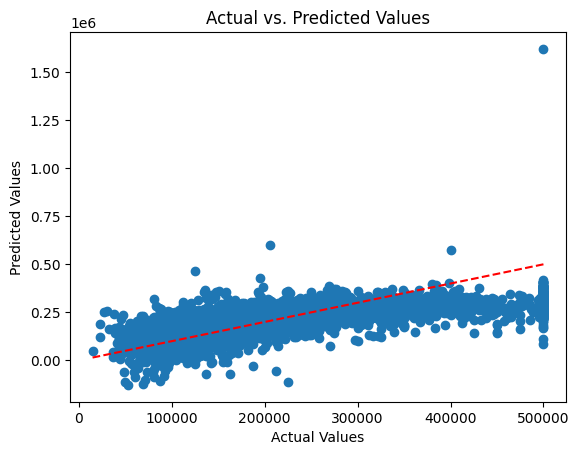

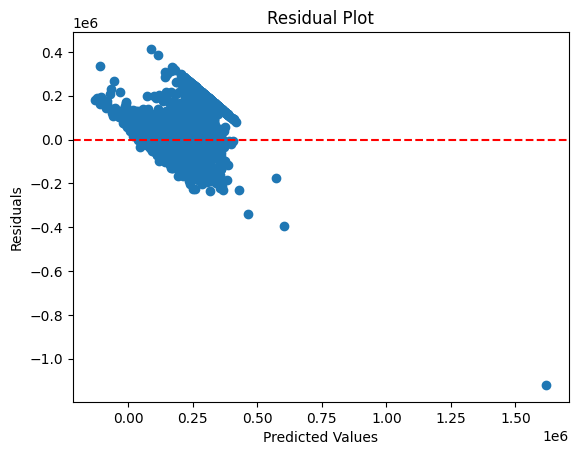

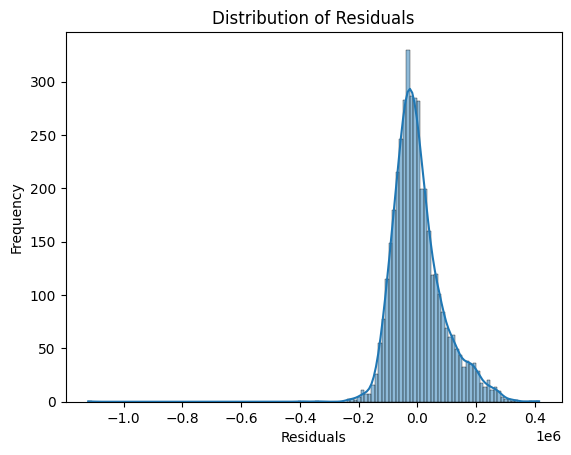

In [18]:
# Assess model graphically
assessModelGraphs(yTest, M1YPredictions)

### Comment on Predictive Ability

I believe that the model M1 had some success with predicting the values of "median_house_value", however on the whole the model did not do a very good job.

> Comments on Statistical Analysis
* The Mean Squared Error (MSE) and Mean Absolute Error (MAE) should be as low as possible to indicate a good model.
    * The MSE was (7,513,838,400.39 (rounded to 2 decimal points)) which at first looks incredibly high however due to this value being squared, MSE is incredibly sensitive to outliers - which I had already noted are present in the dataset in the "Data Understanding" section.
    * The MAE was (64,287.52 (rounded to 2 decimal points)), which is a far more reasonable representation of the evaluation of the model, indicates that the model did have some success at predicting values - espcially considering this value is less than that of the value of a standard deviation present in the feature (115,395.62 (rounded to 2 decimal points)).
* The R<sup>2</sup> value should be as close to 1 as possible to indicate a good model.
    * The R<sup>2</sup> value was (0.44 (rounded to 2 decimal points)), which supports the idea that the model did have some success but on the whole the model was not very good at predicting the values for "median_house_value".

> Comments on Graphical Analysis
* For the scatter graph of Actual Values vs Predicted Values, ideally the points will fall along a perfect diagonal line where x = y indicating that the model perfectly predicted the values.
    * The scatter graph shows that the model had some success with predicting the values as the datapoints are clustered around the ideal line, however it should be highlighted that the accuracy looks to start to fall as the value increases - additionally there is a number of anomalous data points on the graph indicating that the model did fail to always predict the values accurately.
* For the scatter graph of Residuals vs Predicted Values, ideally the points will fall along the horizontal line at y = 0 indicating that the difference between the predicted value and actual value was 0 and therefore correct.
    * The scatter graph again shows that the model had some success but overall did not do a very good job at predicting the values, additionally once again it is important to note there are quite a few anomalous data points.
* For the bar chart showing the Distribution of Residuals, ideally it would be a normal distribution to indicate the model did a good job of predicting the values.
    * The bar chart shows that the model overall was not good at predicting the values as the chart is not symmetrical - potentially indicating that the model tends to predict a value less than that of the actual value.

## Machine Learning Model 2 (M2)

### Create SVR Model


In [ ]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR

# Decide whether to perform hyperparameter tuning
M2HyperparameterTune = True

if M2HyperparameterTune == True:
    # Hyperparameters to change in tuning stage
    M2ParameterGrid = {
        "C" : [1, 10, 100, 1000],
        "epsilon" : [0.001, 0.01, 0.1],
        "gamma": [1e-6, 1e-5, 1e-4]
    }

    # Using generalized hyperparameter tuning function defined in
    # "Model Assessment Utilities/Hyperparameter Tuning"
    M2 = hyperparameterTune(SVR(), M2ParameterGrid)
else:
    # Last known best combination of parameters
    M2Parameters = {
        "C" : 1000,
        "epsilon" : 0.001,
        "gamma" : 1e-05
    }

    print(f"Used last known best combination of parameters : {M2Parameters}")

    # Create and Train model based on last known best combination of parameters
    M2 = SVR(**M2Parameters)
    M2.fit(xTrain, yTrain)

### Use M2 to Predict on Test Data


In [ ]:
# Make predictions based on the testing set
M2YPredictions = M2.predict(xTest)

### Rationale

As the task is to predict values for "median_house_value" a regression model is necessary rather than a classification model.

Model Selection :
> Support Vector Regression
* I chose a Support Vector Regression model as it can be particularly effective when there is a non-linear relationship between the input features and the target feature.

Training the Model :
> I trained the model using the training data partitioned in the "Train/Test Split" section.

Hyperparameter Tuning :
> I generalized the code for hyperparameter tuning and placed it in "Model Assessment Utilities/Hyperparameter Tuning" and provided the option within the model creation stage to either run the hyperparameter tuning or use hard-coded values that I derived using the hyperparameter tuning to save time as the tuning can take quite some time.

> I have used GridSearchCV from scikit-learn for hyperparameter tuning which systematically goes through the provided hyperparameters performing kfolds validation on the training data and assesses the model's performance with each of the hyperparameters. In this case the hyperparameters provided are the following :
* "C" - This controls the trade-off between tolerating outliers (low C) and not tolerating outliers (high C).
* "epsilon" - This controls the acceptability of errors in the model.
* "gamma" - This controls the influence that a single datapoint has on the decision boundary.

Identifying the Best Hyperparameters :
> Using the ".best_params_" attribute of the GridSearchCV object, I identified and printed out the hyperparameters that resulted in the model with the best performance for future reference. In this case the best hyperparameters were :
* "C" = 1000
* "epsilon" = 0.001
* "gamma" = 1e-5

The time taken for model creation and hyperparameter tuning/training was around 2575 second = ~ 42 minutes.

### Assessing M2's Performance

#### Using Statistical Methods

In [ ]:
# Assess model statistically
assessModelStatistics(yTest, M2YPredictions)

#### Using Graphical Methods

In [ ]:
# Assess model graphically
assessModelGraphs(yTest, M2YPredictions)

### Comment on Predictive Ability

I believe that the model M2 was not able to predict values for "median_house_value" at all, this could potentially indicate that there is no non-linear relationship between the input features and the target feature. Additionally this is potentially due to the presence of outliers in the dataset.

> Comments on Statistical Analysis
* The Mean Squared Error (MSE) and Mean Absolute Error (MAE) should be as low as possible to indicate a good model.
    * The MSE was (13,079,104,432.25 (rounded to 2 decimal points)) which at first looks incredibly high however due to this value being squared, MSE is incredibly sensitive to outliers - which I had already noted are present in the dataset in the "Data Understanding" section.
    * The MAE was (85,514.37 (rounded to 2 decimal points)), which is a far more reasonable representation of the evaluation of the model, still indicates that the model was very poor at predicting the value of "median_house_value"
* The R<sup>2</sup> value should be as close to 1 as possible to indicate a good model.
    * The R<sup>2</sup> value was (0.03 (rounded to 2 decimal points)), which supports the idea that the model was very poor at predicting the values for "median_house_value".

> Comments on Graphical Analysis
* For the scatter graph of Actual Values vs Predicted Values, ideally the points will fall along a perfect diagonal line where x = y indicating that the model perfectly predicted the values.
    * The scatter graph shows that the model seemingly only predicted values between (~140,000 - ~240,000)
* For the scatter graph of Residuals vs Predicted Values, ideally the points will fall along the horizontal line at y = 0 indicating that the difference between the predicted value and actual value was 0 and therefore correct.
    * The scatter graph again shows that the model was very poor at predicting the values for "median_house_value" with some coincidental success but on the whole a very poor performance.
* For the bar chart showing the Distribution of Residuals, ideally it would be a normal distribution to indicate the model did a good job of predicting the values.
    * The bar chart shows that the model overall was not good at predicting the values as the chart is not at all like a normal distribution - indicating that without the removal of outliers and potentially scaling the data this method is very poor at predicting the values.

## Machine Learning Model 3 (M3)

### Create Random Forest Regressor Model

In [ ]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

# Decide whether to perform hyperparameter tuning
M3HyperparameterTune = True

if M3HyperparameterTune == True:
    # Hyperparameters to change in tuning stage
    M3ParameterGrid = {
        "n_estimators" : [10, 50, 100],
        "max_depth" : [2, 10, 20],
        "min_samples_split" : [2, 5, 10],
        "min_samples_leaf" : [1, 2, 4]
    }

    # Using generalized hyperparameter tuning function defined in
    # "Model Assessment Utilities/Hyperparameter Tuning"
    M3 = hyperparameterTune(RandomForestRegressor(), M3ParameterGrid)
else:
    # Last known best combination of parameters
    M3Parameters = {
        "n_estimators" : 100,
        "max_depth" : 20,
        "min_samples_split" : 5,
        "min_samples_leaf" : 1
    }

    print(f"Used last known best combination of parameters : {M3Parameters}")

    # Create and Train model based on last known best combination of parameters
    M3 = RandomForestRegressor(**M3Parameters)
    M3.fit(xTrain, yTrain)

### Use M3 to Predict on Test Data


In [ ]:
# Make predictions based on the testing set
M3YPredictions = M3.predict(xTest)

### Rationale

As the task is to predict values for "median_house_value" a regression model is necessary rather than a classification model.

Model Selection :
> Random Forest Regression
* I chose a Support Vector Regression model as it can be particularly effective when there is a non-linear relationship between the input features and the target feature.

Training the Model :
> I trained the model using the training data partitioned in the "Train/Test Split" section.

Hyperparameter Tuning :
> I generalized the code for hyperparameter tuning and placed it in "Model Assessment Utilities/Hyperparameter Tuning" and provided the option within the model creation stage to either run the hyperparameter tuning or use hard-coded values that I derived using the hyperparameter tuning to save time as the tuning can take quite some time.

> I have used GridSearchCV from scikit-learn for hyperparameter tuning which systematically goes through the provided hyperparameters performing kfolds validation on the training data and assesses the model's performance with each of the hyperparameters. In this case the hyperparameters provided are the following :
* "n_estimators" - Determines the number of decision trees in the ensemble.
* "max_depth" - Controls the maximum depth of the individual decision trees.
* "min_samples_split" - Determines the minimum number of samples required to split an internal node.
* "min_samples_leaf" - Determines the minimum number of samples required to be at a leaf node.

Identifying the Best Hyperparameters :
> Using the ".best_params_" attribute of the GridSearchCV object, I identified and printed out the hyperparameters that resulted in the model with the best performance for future reference. In this case the best hyperparameters were :
* "n_estimators" = 100
* "max_depth" = 20
* "min_samples_split" = 5
* "min_samples_leaf" = 1



The time taken for model creation and hyperparameter tuning/training was around 1474 second = ~ 24 minutes.

### Assessing M3's Performance

#### Using Statistical Methods

In [ ]:
# Assess model statistically
assessModelStatistics(yTest, M3YPredictions)

#### Using Graphical Methods

In [ ]:
# Assess model graphically
assessModelGraphs(yTest, M3YPredictions)

### Comment on Predictive Ability

I believe that the model M3 was able to predict the values for "median_house_value" well.

> Comments on Statistical Analysis
* The Mean Squared Error (MSE) and Mean Absolute Error (MAE) should be as low as possible to indicate a good model.
    * The MSE was (2,502,381,516.66 (rounded to 2 decimal points)) which at first looks incredibly high however due to this value being squared, MSE is incredibly sensitive to outliers - which I had already noted are present in the dataset in the "Data Understanding" section.
    * The MAE was (33,536.68 (rounded to 2 decimal points)), which is a far more reasonable representation of the evaluation of the model, indicates that the model was quite good at predicting values - especially as this value is close to a quarter of the standard deviation for this feature (115,395.62 (rounded to 2 decimal points)).
* The R<sup>2</sup> value should be as close to 1 as possible to indicate a good model.
    * The R<sup>2</sup> value was (0.81 (rounded to 2 decimal points)), which supports the idea that the model was quite good at predicting the values for "median_house_value".

> Comments on Graphical Analysis
* For the scatter graph of Actual Values vs Predicted Values, ideally the points will fall along a perfect diagonal line where x = y indicating that the model perfectly predicted the values.
    * The scatter graph shows that the model had a good degree of accuracy with a good proportion of the datapoints lying close to the ideal line. Again it is important to note that there are some anomalous datapoints potentially due to the presence of outliers within the dataset.
* For the scatter graph of Residuals vs Predicted Values, ideally the points will fall along the horizontal line at y = 0 indicating that the difference between the predicted value and actual value was 0 and therefore correct.
    * The scatter graph again shows that the model was quite good at predicting the values of the dataset, while again there are some anomalous data points likely due to the presence of outliers within the dataset.
* For the bar chart showing the Distribution of Residuals, ideally it would be a normal distribution to indicate the model did a good job of predicting the values.
    * The bar chart shows that the model overall was quite good at predicting the values as the distribution is similar to the ideal normal distribution of frequency of residuals.

## Comparison Between Models
In this section you will comment on the difference in predictive ability between models, the difference in analysis metrics between models, and the pros/cons of each model as you understand it.

### Difference in Predictive Ability

The models I created vary on their predictive ability due to their varying strengths and weaknesses for the dataset and it's quality. I created three regression models to predict the "median_house_value" for the geographic areas represented in the dataset :

Linear Regression (M1)
> I created a Linear Regression model which assumes an approximatly linear relationship between the input features and the target feature.
* This model had some success with predicting the value for "median_house_value", however on the whole this model was not able to consistently predict the values - particularly the higher values as evidenced by the analysis metrics/graphs.
    * I believe this to be due to there being a potentially non-linear relationship between the input features and the target features which would have resulted in the model having a wrong assumption that it built it's training upon as evidenced by its apparent tendancy to predict values lower than the actual value for the "median_house_value" - which could support my theory of the presence of non-linear relationships between the input features and the target feature. Additionally the presence of outliers within the dataset could have skewed the training of the dataset.
    * For hyperparameter tuning, as the model is fairly simple to begin with I was only able to tune "fit_intercept" which could only have the value of "True/False", this meant that the time it took for the hyperparameter tuning was quite short at : ~ 0.4 seconds.
        * From my hyperparameter tuning I derived the following to be the best hyperparameters for the model :
            * "fit_intercept" = True

Support Vector Regression (M2)
> I created a Support Vector Regression (SVR) model which is a variation of Support Vector Machines (SVM) which can be used for regression rather than classification. SVR tries to approximate the relationship between the input features and the target feature by using epsilon to penalize errors.
* This model was very poor at predicting the values for "median_house_value", seemingly only predicting a range of values between ~140000-240000 as evidenced by the analysis metrics/graphs.
    * I believe this to be due to the presence of outliers still being in the dataset which were having an adverse affect on the model due to masking the true underlying relationship between the input features and the target feature, additionally potentially due to outliers becoming support vectors for the model and therefore erroding the predictive ability of the model.
    * For hyperparameter tuning, I was able to tune "C, epsilon and gamma" which could all take continuous values which combined with the time needed to train a single SVR model meant the hyperparameter tuning took quite some time even after I identified suitible values to attempt : ~ 42 minutes.
        * From my hyperparameter tuning I derived the following to be the best hyperparameters for the model :
            * "C" = 1000
            * "epsilon" = 0.001
            * "gamma" = 1e-5

Random Forest Regression (M3)
> I created a Random Forest Regression model which is an ensemble of decision trees where the ultimate prediction is a combination of the decision from each of the individual trees.
* The model was quite good at predicting the values for "median_house_value" as evidenced by the analysis metrics/graphs.
    * I believe this to be due to the robustness against outliers that the Random Forest Regression provides in addition to its ability to learn the relationships between the input features and the target feature.
    * For hyperparameter tuning, I was able to tune "n_estimators, max_depth, min_samples_split and min_samples_leaf" which again could all take continuous values which when combined with the amount of time it took to train a single Random Forest Regression resulted in the hyperparameter tuning taking quite some time even after I identified suitible values to attempt : ~ 24 minutes.
        * From my hyperparameter tuning I derived the following to be the best hyperparameters for the model :
            * "n_estimators" = 100
            * "max_depth" = 20
            * "min_samples_split" = 5
            * "min_samples_leaf" = 1

Note : I generalized the code for hyperparameter tuning and placed it in "Model Assessment Utilities/Hyperparameter Tuning" and provided the option within each of the model creation stages to either run the hyperparameter tuning or use hard-coded values that I derived using the hyperparameter tuning to save time as the tuning can take quite some time.


### Assessing Each of the Model's Performance Together for Easier Comparison

In [ ]:
# Assessing each of the model's performance together for comparison

# M1 (Linear Regression)
print("=" * 55)
print("Assessing M1 (Linear Regression)")
# Assess model statistically
assessModelStatistics(yTest, M1YPredictions)
print("Time taken for model creation and hyperparameter tuning/training : 0.38 seconds")
# Assess model graphically
assessModelGraphs(yTest, M1YPredictions)
print("=" * 55)

# M2 (SVR)
print("=" * 55)
print("Assessing M2 (SVR)")
# Assess model statistically
assessModelStatistics(yTest, M2YPredictions)
print("Time taken for model creation and hyperparameter tuning/training : 2575 seconds")
# Assess model graphically
assessModelGraphs(yTest, M2YPredictions)
print("=" * 55)

# M3 (Random Forest Regression)
print("=" * 55)
print("Assessing M3 (Random Forest Regression)")
# Assess model statistically
assessModelStatistics(yTest, M3YPredictions)
print("Time taken for model creation and hyperparameter tuning/training : 1474 seconds")
# Assess model graphically
assessModelGraphs(yTest, M3YPredictions)
print("=" * 55)

### Difference in Analysis Metrics

As outlined in "Metric Selection/Select Appropriate Metrics" section, I used the following suitable metrics for assessing the predictive ability of the machine learning models :
* Mean Squared Error (MSE) : Lower scores indicate better models
* Mean Absolute Error (MAE) : Lower scores indicate better models
* Coefficient of Determination (R<sup>2</sup>) : The closer the score is to 1 the better the model
* Time taken for creation and hyperparameter tuning/training of the models

Additionally I created graphs to graphically assess the model's predictive ability using the following graphs :
* Scatter graph of Actual Values vs Predicted Values, ideally the points will fall along a perfect diagonal line where x = y indicating that the model perfectly predicted the values.
* Scatter graph of Residuals vs Predicted Values, ideally the points will fall along the horizontal line at y = 0 indicating that the difference between the predicted value and actual value was 0 and therefore correct.
* Bar chart showing the Distribution of Residuals, ideally it would be a normal distribution to indicate the model did a good job of predicting the values.

The values for the metrics for each of the models are the following :

Linear Regression (M1)
> These values support my theory that the linear regression model had some success at predicting the values for "median_house_value" however on the whole was not able to accurately predict values consistently. Of the models I created this model's predictive ability is mediocre.
* Mean Squared Error : 7513838400.391473
* Mean Absolute Error : 64287.51959489999
* R-squared: 0.4431290815466794
* Time taken for model creation and hyperparameter tuning/training : 0.38 seconds

Support Vector Regression (M2)
> These values support my theory that the SVR model was very poor at predicting the values for "median_house_value". Of the models I created this model's predictive ability is very poor.
* Mean Squared Error : 13079104432.251133
* Mean Absolute Error : 85514.37131816018
* R-squared: 0.030672139907198526
* Time taken for model creation and hyperparameter tuning/training : 2575 seconds

Random Forest Regression (M3)
> These values support my theory that the Random Forest Regression model was quite good at predicting the values for "median_house_value". Of the models I created this model's predictive ability is very good.
* Mean Squared Error : 2535952621.948758
* Mean Absolute Error : 33647.67216546736
* R-squared: 0.8120536814226487
* Time taken for model creation and hyperparameter tuning/training : 1474 seconds

My analysis of the graphs I created for each of the models is the following :

Scatter Graph of Actual Values vs Predicted Values
> From comparing the graphs it is clear that they support my theory that the predictive ability of the Linear Regression model (M1) was mediocre, SVR (M2) was very poor and Random Forest Regression (M3) was very good.
* Linear Regression (M1) :
    * The scatter graph shows that the model had some success with predicting the values as the datapoints are clustered around the ideal line, however it should be highlighted that the accuracy looks to start to fall as the value increases - additionally there is a number of anomalous data points on the graph indicating that the model did fail to always predict the values accurately.
* SVR (M2) :
    * The scatter graph shows that the model seemingly only predicted values between (~140,000 - ~240,000)
* Random Forest Regression (M3) :
    * The scatter graph shows that the model had a good degree of accuracy with a good proportion of the datapoints lying close to the ideal line. Again it is important to note that there are some anomalous datapoints potentially due to the presence of outliers within the dataset.

Scatter graph of Residuals vs Predicted Values
> From comparing the graphs once again it is clear that they support my theory that the predictive ability of the Linear Regression model (M1) was mediocre, SVR (M2) was very poor and Random Forest Regression (M3) was very good.
* Linear Regression (M1) :
    * The scatter graph again shows that the model had some success but overall did not do a very good job at predicting the values, additionally once again it is important to note there are quite a few anomalous data points.
* SVR (M2) :
    * The scatter graph again shows that the model was very poor at predicting the values for "median_house_value" with some coincidental success but on the whole a very poor performance.
* Random Forest Regression (M3) :
    * The scatter graph again shows that the model was quite good at predicting the values of the dataset, while again there are some anomalous data points likely due to the presence of outliers within the dataset.

Bar chart showing the Distribution of Residuals
> Finally once again from comparing the graphs it is clear that they support my theory that the predictive ability of the Linear Regression model (M1) was mediocre, SVR (M2) was very poor and Random Forest Regression (M3) was very good.
* Linear Regression (M1) :
    * The bar chart shows that the model overall was not good at predicting the values as the chart is not symmetrical - potentially indicating that the model tends to predict a value less than that of the actual value.
* SVR (M2) :
    * The bar chart shows that the model overall was not good at predicting the values as the chart is not at all like a normal distribution - indicating that without the removal of outliers and potentially scaling the data this method is very poor at predicting the values.
* Random Forest Regression (M3) :
    * The bar chart shows that the model overall was quite good at predicting the values as the distribution is similar to the ideal normal distribution of frequency of residuals.

### Pros/Cons

Linear Regression :
> Benefits :
* Simplicity - Due to the relatively simple nature of the model it is easier to understand as the developer and explain to stakeholders what the model is doing and how it has come to the predictions it has.
* Efficiency - Due to how the model works the hyperparameter tuning/training as well as prediction of new data is very quick and computationally efficient which should scale well to even larger datasets.

> Drawbacks :
* Assumption of linear relationship - Linear regression assumes that there is a linear relationship between the input features and the target features, of course if this is not the case, it can lead to the model resulting in incorrect predictions.
* Sensitive to Outliers - The presence of outliers has a negative impact on the predictive ability of the model.

Support Vector Regression :
> Benefits :
* Choice of Kernels - The ability to pick different kernels depending on the dataset gives the model flexibility and the ability to understand more complex relationships between the data.
* Handles non-linearity - The model is able to understand non-linear relationships between the data which allows it to have greater predictive ability in such cases.

> Drawbacks :
* Computationally Intensive - Especially with large datasets the training and consequently hyperparameter tuning is very computationally intensive.
* Interpretability - Understanding how the SVR works as a developer and explaining its functionality to stakeholders is hard due to the training complexity and how the model came to its predictions.
* Sensitive to Outliers - The presence of outliers has a negative impact on the predictive ability of the model.

Random Forest Regression :
> Benefits :
* Accuracy - Due to Random Forest Regression combining the results of multiple decision trees they seem to genererally result in models with good predictive ability.
* Robust against Outliers - Outliers are handled by the combination of multiple decision tree outputs being able to agree or disagree on what the prediction should be.
* Handles non-linearity - The model is able to understand non-linear relationships between the data which allows it to have greater predictive ability in such cases.

> Drawbacks :
* Computationally Intensive - The creation of the multiple decision trees is computationally intensive, compounded when performing hyperparameter tuning as this construction must be done many times.
* Interpretability - While it is possible to extract the computed feature weights it is still hard to explain to stakeholders what the model is doing and how it came to its predictions.

## Conclusion
In this section you will draw conclusions about the models you've selected, and efficacy of different analysis metrics you've used, and any additional comments or concerns about the models or metrics you've observed.

### Model Selection

Linear Regression :
> I have found that Linear Regression models are relatively easy to understand and implement as well as they are able to scale well to large datasets, however they are impacted by outliers present in the dataset and assume a linear relationship between the input features and the target feature.

> Situations where I would choose this model are :
* When the relationships present in the data are linear (or are transformable to linear) or are close enough to linear so an approximation to a linear relationship is suitable.
* When it is necessary to be able to explain the methodology of the model to stakeholders.
* Where the dataset for the task is large

Support Vector Regression :
> I have found that Support Vector Regression models are flexible and have the ability to understand complex relationships within the data like non-linearity, however they are severely impacted by the presence of outliers within the data, particularly computationaly intensive compared to other models and are hard to understand and explain to stakeholders.

> Situations where I would choose this model are :
* When the relationships present in the data are complex and could potentially need further investigation with the use of different kernels/hyperparameters.
* Where the time to tune the hyperparameters and train the model is not a major factor as SVRs are computationaly intensive.
* Where it is certain outliers are not present in the data as these models are particularly impacted by them.

Random Forest Regression :
>I have found that Random Forest Regression models are generally accurate, can handle non-linear relationships between data and robust against the presence of outliers within the data, however they are computationally intensive and are difficult to understand and explain to stakeholders how they reach their predictions.

> Situations where I would choose this model are :
* When the relationships present in the data are complex.
* Where a high accuracy for the model is a major consideration.
* Where the dataset for the task is large.

### Analysis Metrics

Metrics for Analyzing Machine Learning Models
> Classification Metrics
* Confusion Matrix
    * Shows the predicted cases against the actual cases as a heatmap.
    * Measure of a good model - Want the perfect diagonal to be dominant with no non-zero items elsewhere
* Accuracy
    * Out of all predictions, how many predicted correctly.
    * Measure of a good model - Closest to 0
* Recall
    * Of the positive predicted cases, how many were correct.
    * Measure of a good model - Closest to 0
* Precision
    * Of the positive predicted cases, how many were positive.
    * Measure of a good model - Closest to 1
* F1
    * The harmonic mean of precision and recall.
    * Measure of a good model - Closest to 1

> Regression Metrics
* Mean Squared Error (MSE)
    * The squared mean error value from the predictions from the model.
    * Measure of a good model - Closest to 0
* Mean Absolute Error (MAE)
    * The absolute mean error value from the predictions from the model.
    * Measure of a good model - Closest to 0
* Coefficient of Determination (R<sup>2</sup>)
    * A measure of how good a hypothesis is compared to a perfect hypothesis and the actual mean.
    * Measure of a good model - Closest to 1


Situations where I would pick one set of metrics over the other :
> Classification Metrics
* Where the task is to determine whether an item is a member of one group or another, and as such a classification model is being utilised - potentially multiple times in the case of multi-classification tasks.

> Regression Metrics
* Where the task is to determine a continuous value for an item, and as such a regression model is being utilised.

My conclusions for the metrics I have utilised for this task (Regression Metrics) :
> Mean Squared Error (MSE)/Mean Absolute Error (MAE)
* I did not find the MSE metric particularly useful when used with MAE as MSE is impacted heavily by outliers and MAE seemed to provide a better metric for understanding the Mean Error of the model.

> Coefficient of Determination (R<sup>2</sup>)
* I found R<sup>2</sup> very useful in understanding the predictive ability of the models I created as it returned a value on a defined scale so I could understand how good my model was at predicting the values for "median_house_value".